#### Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link
Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.
Q2. Split the dataset into a training set (70%) and a test set (30%).
Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.
Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.
Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.
Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.
Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.
Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [91]:
pip install pandas scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Step 1 Load the dataset
data_url = 'https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=sharing'
file_id = data_url.split('/')[-2]
download_url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(download_url)

# Display the first few rows of the dataset
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [93]:
# Check for missing values
print(df.isnull().sum())

# No missing values found in this dataset

# Encoding categorical variables (if any)
df.nunique()
# There are categorical variables in this dataset

# Scaling numerical features (if necessary)



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

#### Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

To preprocess the dataset, we'll follow these steps:

Load the dataset from the provided link.
Handle missing values, if any.
Encode categorical variables.
Scale numerical features, if necessary.


# Note:
The line of code you provided is used to extract the file ID from a URL. It assumes that the URL follows a specific pattern where the file ID is the second-to-last component of the URL path.
Let's break down the code:
1. `url.split('/')`: This splits the URL string into a list of components using the forward slash ('/') as the separator.
2. `[-2]`: This index selects the second-to-last component from the list obtained in the previous step.
3. `file_id = `: This assigns the selected component (file ID) to the variable `file_id`.

Here's an example to demonstrate the usage:

```python
url = "https://example.com/files/abc123/file.pdf"
file_id = url.split('/')[-2]
print(file_id)
```

Output:
```
abc123
```

In this example, the file ID "abc123" is extracted from the URL, which is the second-to-last component in the path.

In [94]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

heart_df = df

# Step 2: Handle missing values
heart_df = heart_df.dropna()

# Step 3: Encode categorical variables
label_encoder = LabelEncoder()
heart_df['sex'] = label_encoder.fit_transform(heart_df['sex'])
heart_df['cp'] = label_encoder.fit_transform(heart_df['cp'])
heart_df['fbs'] = label_encoder.fit_transform(heart_df['fbs'])
heart_df['restecg'] = label_encoder.fit_transform(heart_df['restecg'])
heart_df['exang'] = label_encoder.fit_transform(heart_df['exang'])
heart_df['slope'] = label_encoder.fit_transform(heart_df['slope'])
heart_df['ca'] = label_encoder.fit_transform(heart_df['ca'])
heart_df['thal'] = label_encoder.fit_transform(heart_df['thal'])

# Step 4: Scale numerical features
scaler = StandardScaler()
heart_df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(
    heart_df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
)


In [95]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [96]:
#### Q2. Split the dataset into a training set (70%) and a test set (30%).
from sklearn.model_selection import train_test_split

X = heart_df.drop('target', axis=1)
y = heart_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [97]:
#### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [98]:
#### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8132
Precision: 0.8367
Recall: 0.8200
F1 Score: 0.8283


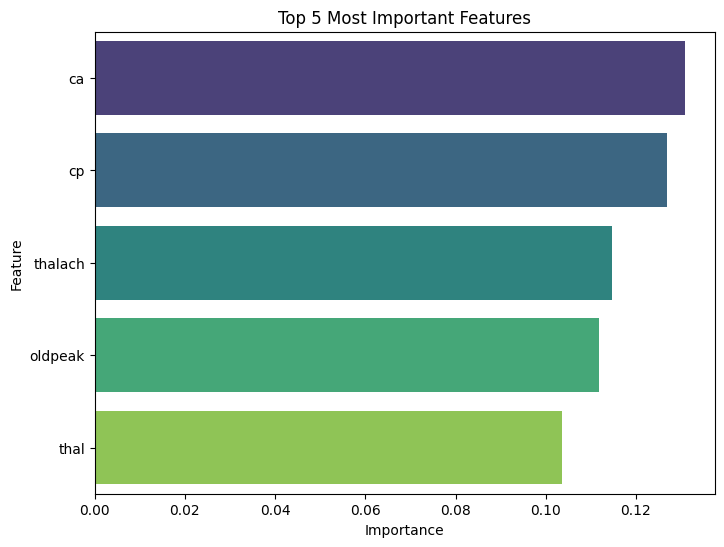

In [99]:
####Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualize the feature importances using a bar chart.

import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = rf_classifier.feature_importances_
feature_names = X_train.columns

# Create a dataframe with feature names and importances
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_df = feature_df.sort_values('Importance', ascending=False).head(5)

# Plot the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Top 5 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



In [100]:
#### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [101]:
#### Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.
tuned_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
tuned_rf_classifier.fit(X_train, y_train)
best_model =tuned_rf_classifier
y_pred_tuned = tuned_rf_classifier.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print("Best Hyperparameters:")
print(best_params)
print("\nPerformance Metrics (Tuned Model):")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1 Score: {f1_tuned:.4f}")

print("\nPerformance Metrics (Default Model):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Best Hyperparameters:
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Performance Metrics (Tuned Model):
Accuracy: 0.8352
Precision: 0.8302
Recall: 0.8800
F1 Score: 0.8544

Performance Metrics (Default Model):
Accuracy: 0.8132
Precision: 0.8367
Recall: 0.8200
F1 Score: 0.8283


##### Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

C:\Users\rajab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


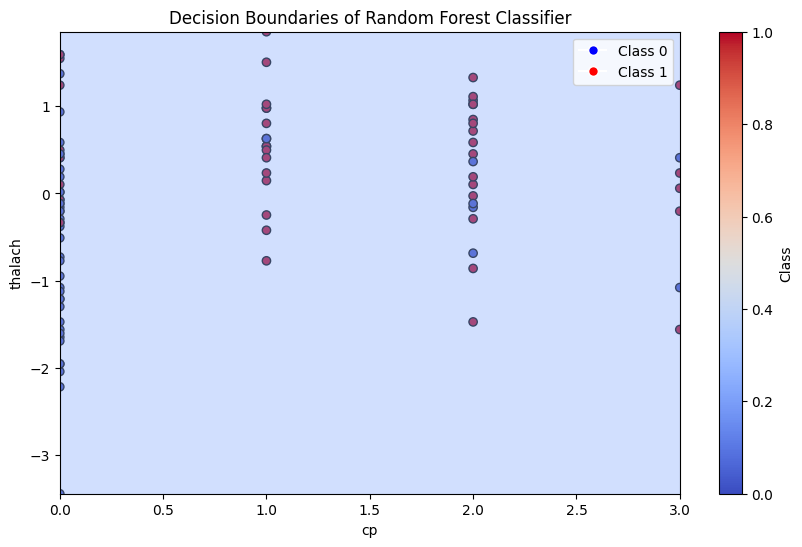

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("error", message=".*check_inverse*.",category=UserWarning, append=False)

# Select the two most important features
selected_features = ['cp', 'thalach']

# Get the corresponding indices of the selected features
feature_indices = [X.columns.get_loc(feature) for feature in selected_features]

# Set the range for the two features
feature1_range = np.linspace(X_test.iloc[:, feature_indices[0]].min(), X_test.iloc[:, feature_indices[0]].max(), 100)
feature2_range = np.linspace(X_test.iloc[:, feature_indices[1]].min(), X_test.iloc[:, feature_indices[1]].max(), 100)

# Create a grid of points representing the feature space
feature1_grid, feature2_grid = np.meshgrid(feature1_range, feature2_range)
grid_points = np.zeros((feature1_grid.size, X.shape[1]))
grid_points[:, feature_indices[0]] = feature1_grid.ravel()
grid_points[:, feature_indices[1]] = feature2_grid.ravel()

# Use the trained classifier to predict class labels for each point in the grid
grid_predictions = best_model.predict(grid_points)
grid_predictions = grid_predictions.reshape(feature1_grid.shape)

# Plot the scatter plot of the two selected features
plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, feature_indices[0]], X_test.iloc[:, feature_indices[1]], c=y_test, cmap='coolwarm', edgecolors='k')
plt.colorbar(label='Class')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])

# Visualize the decision boundaries by contouring the regions
plt.contourf(feature1_grid, feature2_grid, grid_predictions, alpha=0.4, cmap='coolwarm')

# Add a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=7, label='Class 0'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=7, label='Class 1')]
plt.legend(handles=legend_elements)

plt.title('Decision Boundaries of Random Forest Classifier')
plt.show()
